In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from datetime import date
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns
from scipy.stats import chi2_contingency
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import mutual_info_classif
from numpy import array

!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 6.2 MB/s eta 0:00:00


In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load features and labels excel and then merge
#df_features = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_features_final.xlsx", sheet_name=0, na_values="NaN")
#df_labels = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_ticket_labeling.xlsx", sheet_name=0, na_values="NaN")

In [ ]:
#df_labels['problem_label_melina'].astype('int', errors='ignore')
#df_labels['problem_label_philipp'].astype('int', errors='ignore') 
#df_labels['solution_label_melina'].astype('int', errors='ignore') 
#df_labels['solution_label_philipp'].astype('int', errors='ignore')
#df_labels['solution_labels_merged'].astype('int', errors='ignore') 
#df_labels['solution_labels_merged'].astype('int', errors='ignore')  

0      1
1      1
2      1
3      1
4      1
      ..
202   -1
203    1
204    1
205   -1
206    0
Name: solution_labels_merged, Length: 207, dtype: int64

In [3]:
# export merged excel
#df.to_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_merging_features_and_labels.xlsx")

# import excel
df = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_merging_features_and_labels.xlsx", sheet_name=0, na_values="NaN")

In [4]:
df['problem_labels_merged'].value_counts()
df = df[(df.problem_labels_merged ==1) | (df.problem_labels_merged ==0)]

In [5]:
df.shape

(175, 86)

In [6]:
#TODO: tf-idf hinzufügen & weitere hinzufügen:

    # .......
    # 'main_cat',
    #'sub1',
    #'sub2',
    #'sub3',
    #'count_categories',
    #'topic_probs'
    #'interactions_count', -> solution
    #'update_count_work', -> solution
    #'update_count_comment', -> solution
  

features_set= [
    'sentences_count',
    'words_count',
    'words_per_sentence',
    'stop_words_count',
    'words_count_no_stop_words',
    'words_per_sentence_no_stop_words',
    'verbs_count',
    'nouns_count',
    'pronoun_count',
    'Flesch',
    'Coleman',
    'Gunning',
    'links_count',
    'attachments_count',
    'sentiment_score',
    'sentiment',
    'language_confidence',
    'inquery_intensity',
    'special_characters',
    'bulleted_list',
    'bulleted_list_count',
    'spelling_mistakes',
    'pos_tagging_max_depth',
    'verb_noun_combinations',
    'specific_word_count',
    'tfidf_all',
    'tfidf_mean',
    'refrences_count',
    'unknown_words_count',
    'topic_probs'
    ]

In [7]:
features_set = [s + "(Problem)" for s in features_set]

In [8]:
print(features_set)

['sentences_count(Problem)', 'words_count(Problem)', 'words_per_sentence(Problem)', 'stop_words_count(Problem)', 'words_count_no_stop_words(Problem)', 'words_per_sentence_no_stop_words(Problem)', 'verbs_count(Problem)', 'nouns_count(Problem)', 'pronoun_count(Problem)', 'Flesch(Problem)', 'Coleman(Problem)', 'Gunning(Problem)', 'links_count(Problem)', 'attachments_count(Problem)', 'sentiment_score(Problem)', 'sentiment(Problem)', 'language_confidence(Problem)', 'inquery_intensity(Problem)', 'special_characters(Problem)', 'bulleted_list(Problem)', 'bulleted_list_count(Problem)', 'spelling_mistakes(Problem)', 'pos_tagging_max_depth(Problem)', 'verb_noun_combinations(Problem)', 'specific_word_count(Problem)', 'tfidf_all(Problem)', 'tfidf_mean(Problem)', 'refrences_count(Problem)', 'unknown_words_count(Problem)', 'topic_probs(Problem)']


In [9]:
len(features_set)

30

# Variance Analysis

In [10]:
var_thr = VarianceThreshold(threshold = 0.05) #Removing both constant and quasi-constant
#Encode categorical variable
for col in ["sentiment_score(Problem)","bulleted_list(Problem)"]:
    df[col] = LabelEncoder().fit_transform(df[col])

provided_features = []
for feat in features_set:
    if feat in df:
        provided_features.append(feat)
X = df[provided_features]
#scaler = Normalizer().fit(X)
#X_scaled = scaler.transform(X)
#var_thr.fit(X_scaled)
var_thr.fit(X)
var_thr.get_support()
i=0

lst_high_variance =[]
lst_low_variance =[]

print("Variance high? True or False?")
for feat in provided_features:
    #print(feat, ": ", var_thr.get_support()[i])
    if var_thr.get_support()[i]:
        lst_high_variance.append(feat)
    else:
        lst_low_variance.append(feat)
    i+=1

print("----------------------------------------------------------------")
print("High variance features: ", lst_high_variance)
print("Low variance features: ", lst_low_variance)
print(len(lst_high_variance))
X.shape

Variance high? True or False?
----------------------------------------------------------------
High variance features:  ['sentences_count(Problem)', 'words_count(Problem)', 'words_per_sentence(Problem)', 'stop_words_count(Problem)', 'words_count_no_stop_words(Problem)', 'words_per_sentence_no_stop_words(Problem)', 'verbs_count(Problem)', 'nouns_count(Problem)', 'pronoun_count(Problem)', 'Flesch(Problem)', 'Coleman(Problem)', 'Gunning(Problem)', 'links_count(Problem)', 'attachments_count(Problem)', 'sentiment_score(Problem)', 'language_confidence(Problem)', 'inquery_intensity(Problem)', 'special_characters(Problem)', 'bulleted_list(Problem)', 'bulleted_list_count(Problem)', 'pos_tagging_max_depth(Problem)', 'verb_noun_combinations(Problem)', 'specific_word_count(Problem)', 'tfidf_all(Problem)', 'topic_probs(Problem)']
Low variance features:  ['sentiment(Problem)', 'spelling_mistakes(Problem)', 'tfidf_mean(Problem)', 'unknown_words_count(Problem)']
25


(175, 29)

# Correlation matrix

In [11]:
df[lst_high_variance].corr()

,sentences_count(Problem),words_count(Problem),words_per_sentence(Problem),stop_words_count(Problem),words_count_no_stop_words(Problem),words_per_sentence_no_stop_words(Problem),verbs_count(Problem),nouns_count(Problem),pronoun_count(Problem),Flesch(Problem),...,language_confidence(Problem),inquery_intensity(Problem),special_characters(Problem),bulleted_list(Problem),bulleted_list_count(Problem),pos_tagging_max_depth(Problem),verb_noun_combinations(Problem),specific_word_count(Problem),tfidf_all(Problem),topic_probs(Problem)
sentences_count(Problem),1.000000,0.859864,0.059235,0.827965,0.835641,-0.085922,0.771291,0.835611,0.697980,-0.015143,...,0.121264,-0.013310,0.590670,0.321333,0.321333,0.452861,0.611464,0.846081,0.709932,0.075433
words_count(Problem),0.859864,1.000000,0.474385,0.964695,0.970179,0.308527,0.916130,0.949652,0.787700,0.031373,...,0.165852,-0.058139,0.620608,0.345645,0.345645,0.654102,0.755069,0.974520,0.831284,0.111033
words_per_sentence(Problem),0.059235,0.474385,1.000000,0.455534,0.462174,0.884589,0.498391,0.399991,0.321413,0.090262,...,0.243011,-0.134795,0.251277,0.362946,0.362946,0.598446,0.446270,0.405025,0.486181,0.051997
stop_words_count(Problem),0.827965,0.964695,0.455534,1.000000,0.872089,0.196921,0.924389,0.902896,0.826743,0.069705,...,0.142076,-0.038352,0.578646,0.369928,0.369928,0.588545,0.764519,0.908590,0.728092,0.112886
words_count_no_stop_words(Problem),0.835641,0.970179,0.462174,0.872089,1.000000,0.392017,0.851442,0.933508,0.702683,-0.005861,...,0.177400,-0.072728,0.620556,0.301758,0.301758,0.673678,0.699320,0.974473,0.874455,0.102408
words_per_sentence_no_stop_words(Problem),-0.085922,0.308527,0.884589,0.196921,0.392017,1.000000,0.293419,0.243409,0.119091,0.023163,...,0.229172,-0.159048,0.183495,0.212382,0.212382,0.522028,0.273317,0.286244,0.449227,0.045816
verbs_count(Problem),0.771291,0.916130,0.498391,0.924389,0.851442,0.293419,1.000000,0.832649,0.777242,0.120046,...,0.144774,-0.053772,0.563506,0.373993,0.373993,0.588103,0.762524,0.860602,0.711177,0.159073
nouns_count(Problem),0.835611,0.949652,0.399991,0.902896,0.933508,0.243409,0.832649,1.000000,0.681282,0.008520,...,0.158742,-0.063093,0.579829,0.254539,0.254539,0.641868,0.727651,0.942074,0.791531,0.075210
pronoun_count(Problem),0.697980,0.787700,0.321413,0.826743,0.702683,0.119091,0.777242,0.681282,1.000000,0.093491,...,0.100672,-0.015455,0.404643,0.362526,0.362526,0.430736,0.725536,0.736269,0.562888,0.092954
Flesch(Problem),-0.015143,0.031373,0.090262,0.069705,-0.005861,0.023163,0.120046,0.008520,0.093491,1.000000,...,0.180593,-0.118648,-0.196425,0.192032,0.192032,0.014615,0.083296,-0.022745,0.010115,-0.076186


Threshhold auf >0.9 ()
Eins davon raus, nach dem Ranking anhand von Informativeness

In [12]:
# Indexing with numbers on a numpy matrix will probably be faster
corr_matrix = df[lst_high_variance].corr().values
rows, cols = df[lst_high_variance].shape
flds = lst_high_variance

print("----------Pairs of high correlation----------")
for i in range(cols):
    for j in range(i+1, cols):
        if corr_matrix[i,j] > 0.95:
            print(flds[i], ' ', flds[j], ' ', corr_matrix[i,j])

----------Pairs of high correlation----------
words_count(Problem)   stop_words_count(Problem)   0.9646952475371987
words_count(Problem)   words_count_no_stop_words(Problem)   0.9701791036579984
words_count(Problem)   specific_word_count(Problem)   0.9745202972652881
words_count_no_stop_words(Problem)   specific_word_count(Problem)   0.9744728175879679
bulleted_list(Problem)   bulleted_list_count(Problem)   1.0


In [13]:
y= df['problem_labels_merged']

In [14]:
X.shape

(175, 29)

In [15]:
# drop irrelevant columns
# update feature list
to_remove = ['stop_words_count(Problem)', 'words_count_no_stop_words(Problem)', 'sentiment(Problem)', 'special_characters(Problem)', 'words_count(Problem)', 'nouns_count(Problem)', 'bulleted_list(Problem)', 'Gunning(Problem)', 'Coleman(Problem)'] # 'verbs_count', 'stop_words_count', 'words_count']
to_remove.extend(lst_low_variance)

for tr in to_remove:
    if tr in X:
        X.drop([tr], axis=1, inplace=True)
        provided_features.remove(tr)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 01_Initial Models

In [16]:
#Split into two sets of training and testing data

# Select features for model initialization
X_numpy = X.to_numpy()

X_train_res, X_test, y_train_res, y_test = train_test_split(X_numpy, y, test_size=0.2, random_state=42, shuffle=True)

# Oversampling the data
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

#print(X_train_res.shape)
#print(y_train_res.value_counts())

LinearSVC(random_state=123)


Liblinear failed to converge, increase the number of iterations.


SVC - rbf
Recall: 0.583
Accuracy: 0.714
Precision: 0.553
F1 Score: 0.554


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


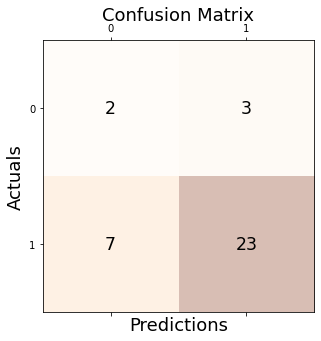

LinearSVC
Recall: 0.683
Accuracy: 0.600
Precision: 0.590
F1 Score: 0.536


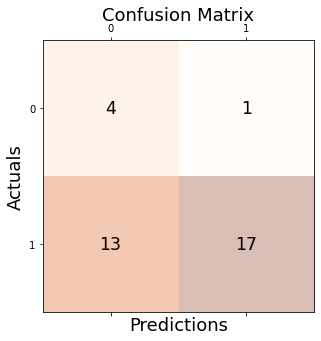

RandomForestClassifier
Recall: 0.583
Accuracy: 0.857
Precision: 0.689
F1 Score: 0.603


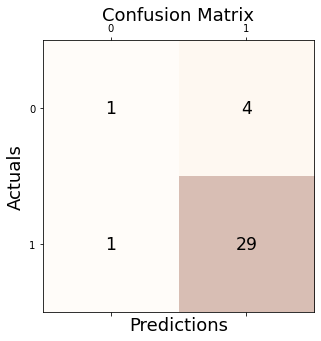

SGDClassifier
Recall: 0.600
Accuracy: 0.314
Precision: 0.586
F1 Score: 0.314


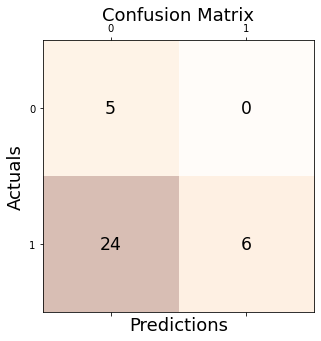

LogisticRegression
Recall: 0.633
Accuracy: 0.800
Precision: 0.615
F1 Score: 0.622


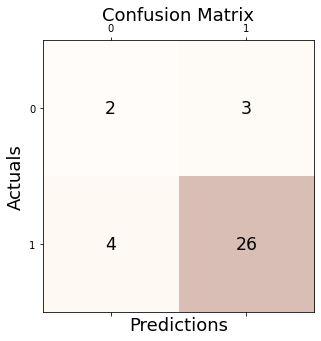

KNN
Recall: 0.583
Accuracy: 0.714
Precision: 0.553
F1 Score: 0.554


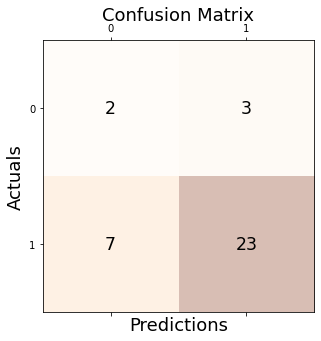

In [34]:
# train classifier
import pickle
classifier = ['SVC - rbf', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'LogisticRegression', 'KNN']
predictions = []
#SVC
################################################################################
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
# predict
y_pred_svc = clf.predict(X_test)
predictions.append(y_pred_svc)

svc = SVC()

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/problem_initated_model_' + classifier[0] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

#LinearSVC
################################################################################
lsvc = LinearSVC(verbose=0, random_state=123)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train_res, y_train_res)
score = lsvc.score(X_train_res, y_train_res)
#print(" LinearSVC Score: ", score)
y_pred_linearsvc = lsvc.predict(X_test)
predictions.append(y_pred_linearsvc)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/problem_initated_model_' + classifier[1] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# RandomForestRegressor
################################################################################

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=110, bootstrap=True)
forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_test)
predictions.append(y_pred)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/problem_initated_model_' + classifier[2] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# SGDClassifier
################################################################################

clf = linear_model.SGDClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
predictions.append(y_pred)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/problem_initated_model_' + classifier[3] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# Logistic Regression
################################################################################

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
predictions.append(y_pred)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/problem_initated_model_' + classifier[4] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

# KNN
#################################################################################
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)
y_pred_neigh = neigh.predict(X_test)
predictions.append(y_pred_neigh)

filename = '/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/problem_initated_model_' + classifier[5] + '.sav'
pickle.dump(clf, open(filename, 'wb'))

#rforest = RandomForestClassifier(random_state=123)
#dtree = DecisionTreeClassifier()

for i, clf in enumerate(classifier):
    print(clf)
    print('Recall: %.3f' % recall_score(y_test, predictions[i], average='macro'))
    print('Accuracy: %.3f' % accuracy_score(y_test, predictions[i]))
    print('Precision: %.3f' % precision_score(y_test, predictions[i], average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, predictions[i], average='macro'))

    # Calculate the confusion matrix
    #
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions[i])
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## Save predictions

In [45]:
# Save prediction

# import excel
df_prediction = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_merging_features_and_labels.xlsx", sheet_name=0, na_values="NaN")

In [46]:
df_prediction.shape

(67171, 86)

(67171, 13)

In [53]:
#Encode categorical variable
for col in ["sentiment_score(Problem)","bulleted_list(Problem)"]:
    df_prediction[col] = LabelEncoder().fit_transform(df_prediction[col])

In [56]:
X = df_prediction[provided_features]

In [57]:
X.shape

(67171, 13)

In [58]:
# drop irrelevant columns
# update feature list
to_remove = ['stop_words_count(Problem)', 'words_count_no_stop_words(Problem)', 'sentiment(Problem)', 'special_characters(Problem)', 'words_count(Problem)', 'nouns_count(Problem)', 'bulleted_list(Problem)', 'Gunning(Problem)', 'Coleman(Problem)'] # 'verbs_count', 'stop_words_count', 'words_count']
to_remove.extend(lst_low_variance)

for tr in to_remove:
    if tr in X:
        X.drop([tr], axis=1, inplace=True)
        provided_features.remove(tr)

In [59]:
y_prediction = forest.predict(X)

X has feature names, but RandomForestClassifier was fitted without feature names


In [60]:
len(y_prediction)

67171

In [61]:
df_prediction['problem_quality_prediction'] = y_prediction

In [62]:
# Save excel with predictions based on clf_reg

df_prediction.to_excel("/content/gdrive/My Drive/Colab Notebooks/Pipeline_Extended/output_problem_quality_scoring.xlsx")


## SHAP (RandomForest)

In [35]:
features_list = provided_features

Average Impact on model output magnitude

In [36]:
X_train_res.shape

(232, 13)

In [37]:
len(provided_features)

13

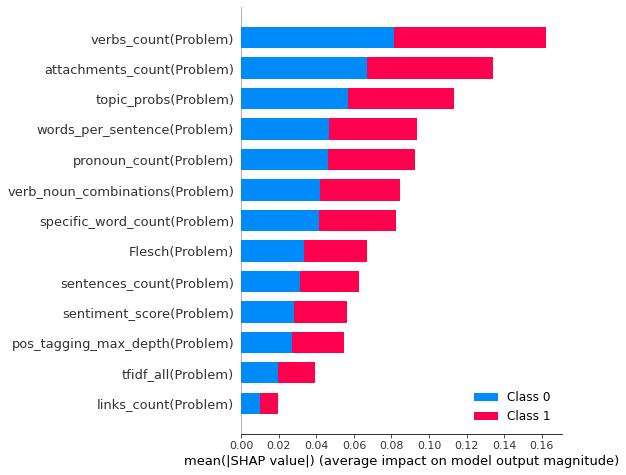

In [38]:
shap_values = shap.TreeExplainer(forest).shap_values(X_train_res)
shap.summary_plot(shap_values, X_train_res, plot_type="bar", feature_names=features_list)

In [22]:
#explainer = shap.Explainer(forest, X_train_res)
#shap_values = explainer(X_train_res)
#shap.plots.waterfall(shap_values[0])

For Low Quality Prediction [0]

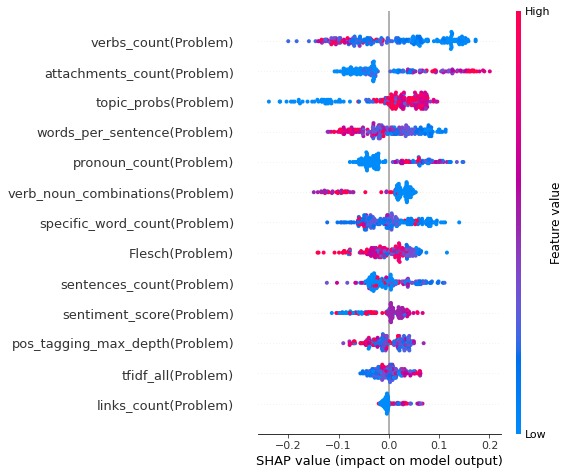

In [39]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values[0], X_train_res, feature_names=features_list)
f.savefig("/summary_plot_0.png", bbox_inches='tight', dpi=600)

For High Quality Prediction [1]

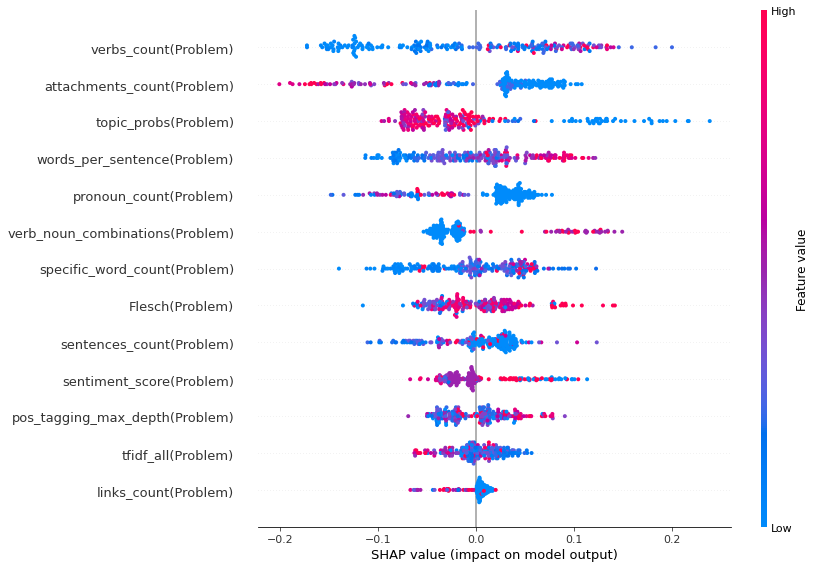

In [40]:
f = plt.figure()
shap.summary_plot(shap_values[1], X_train_res, feature_names=features_list, plot_size=[12,8])
f.savefig("/summary_plot_1.png", bbox_inches='tight', dpi=600)

This plot is made of many dots. Each dot has three characteristics:

Vertical location shows what feature it is depicting
Color shows whether that feature was high or low for that row of the dataset
Horizontal location shows whether the effect of that value caused a higher or lower prediction.

https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values


## Importance Values (RandomForest)

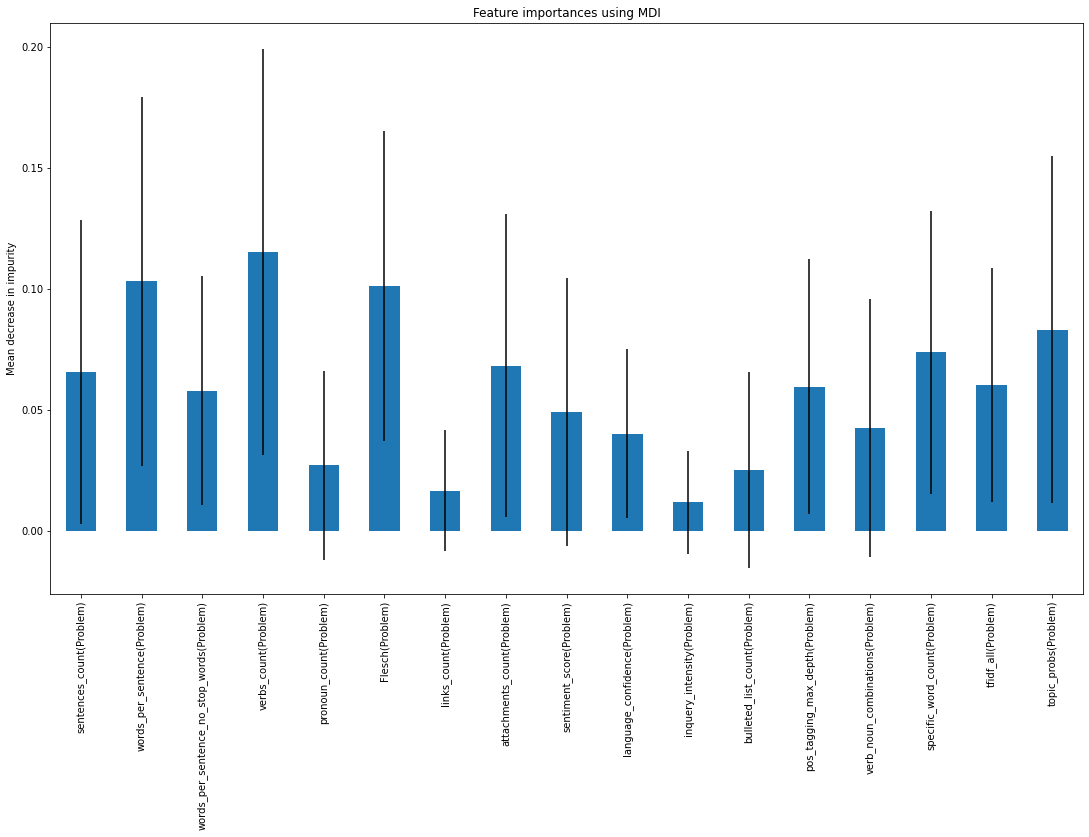

In [25]:
import time
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=features_list)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_size_inches(18.5, 10.5)
plt.savefig('MDI_importances_initial.png')

## Select K **Best**

In [26]:
X = df[features_list]

selector = SelectKBest(mutual_info_classif, k=10)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
print("---------------------------------------------")
print("Selected Columns")
selected_columns

---------------------------------------------
Selected Columns


['sentences_count(Problem)',
 'words_per_sentence(Problem)',
 'verbs_count(Problem)',
 'Flesch(Problem)',
 'links_count(Problem)',
 'sentiment_score(Problem)',
 'pos_tagging_max_depth(Problem)',
 'verb_noun_combinations(Problem)',
 'specific_word_count(Problem)',
 'tfidf_all(Problem)']

### New model on SKB

(232, 10)
1.0    116
0.0    116
Name: problem_labels_merged, dtype: int64
LinearSVC(random_state=123)


Liblinear failed to converge, increase the number of iterations.


SVC - rbf
Recall: 0.583
Accuracy: 0.714
Precision: 0.553
F1 Score: 0.554


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


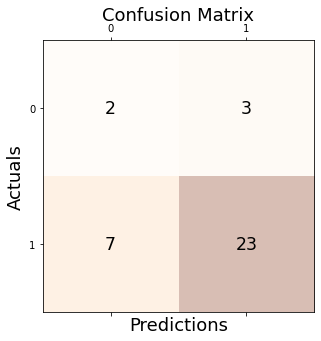

LinearSVC
Recall: 0.617
Accuracy: 0.486
Precision: 0.560
F1 Score: 0.449


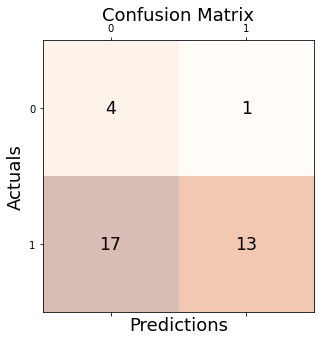

RandomForestClassifier
Recall: 0.667
Accuracy: 0.857
Precision: 0.702
F1 Score: 0.681


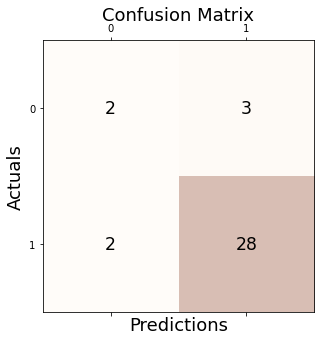

SGDClassifier
Recall: 0.550
Accuracy: 0.229
Precision: 0.578
F1 Score: 0.226


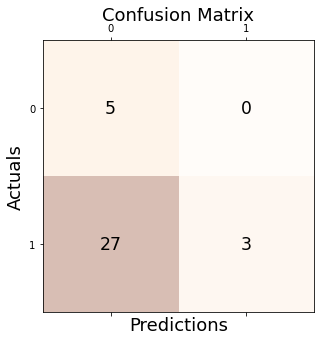

LogisticRegression
Recall: 0.717
Accuracy: 0.657
Precision: 0.608
F1 Score: 0.580


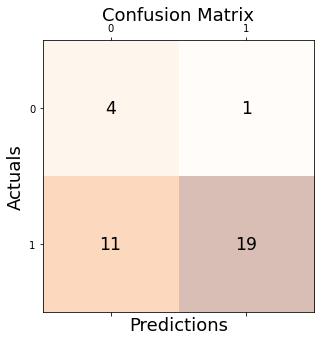

KNN
Recall: 0.683
Accuracy: 0.886
Precision: 0.786
F1 Score: 0.718


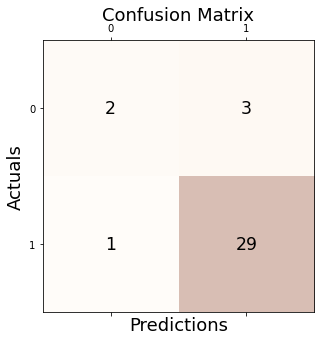

In [27]:
X = df[selected_columns]

#Split into two sets of training and testing data

# Select features for model initialization
X_numpy = X.to_numpy()

X_train_res, X_test, y_train_res, y_test = train_test_split(X_numpy, y, test_size=0.2, random_state=42, shuffle=True)

# Oversampling the data
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

print(X_train_res.shape)
print(y_train_res.value_counts())

# train classifier

classifier = ['SVC - rbf', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'LogisticRegression', 'KNN']
predictions = []
#SVC
################################################################################
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
# predict
y_pred_svc = clf.predict(X_test)
predictions.append(y_pred_svc)

svc = SVC()

#LinearSVC
################################################################################
lsvc = LinearSVC(verbose=0, random_state=123)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train_res, y_train_res)
score = lsvc.score(X_train_res, y_train_res)
#print(" LinearSVC Score: ", score)
y_pred_linearsvc = lsvc.predict(X_test)
predictions.append(y_pred_linearsvc)

# RandomForestRegressor
################################################################################

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=110, bootstrap=True)
forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_test)
predictions.append(y_pred)

# SGDClassifier
################################################################################

clf = linear_model.SGDClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
predictions.append(y_pred)

# Logistic Regression
################################################################################

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
predictions.append(y_pred)

# KNN
#################################################################################
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred_neigh = neigh.predict(X_test)
predictions.append(y_pred_neigh)

#rforest = RandomForestClassifier(random_state=123)
#dtree = DecisionTreeClassifier()

for i, clf in enumerate(classifier):
    print(clf)
    print('Recall: %.3f' % recall_score(y_test, predictions[i], average='macro'))
    print('Accuracy: %.3f' % accuracy_score(y_test, predictions[i]))
    print('Precision: %.3f' % precision_score(y_test, predictions[i], average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, predictions[i], average='macro'))

    # Calculate the confusion matrix
    #
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions[i])
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## Feature Importance & Coefficients (Logistic Regression)



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Feature:  sentences_count(Problem) Score:  (0, 0.18025300272477857)
Feature:  words_per_sentence(Problem) Score:  (1, 0.24447177378957075)
Feature:  words_per_sentence_no_stop_words(Problem) Score:  (2, 0.10811573623157403)
Feature:  verbs_count(Problem) Score:  (3, -0.0013921413312940143)
Feature:  pronoun_count(Problem) Score:  (4, 0.018934971060258828)
Feature:  Flesch(Problem) Score:  (5, -0.17254241213306634)
Feature:  links_count(Problem) Score:  (6, 0.23030183535445295)
Feature:  attachments_count(Problem) Score:  (7, 0.8221498656419715)
Feature:  sentiment_score(Problem) Score:  (8, -0.1679289518312594)
Feature:  language_confidence(Problem) Score:  (9, -0.2908621299596781)
----------------------------------------------------------------
List of high importance features:  ['sentences_count(Problem)', 'words_per_sentence(Problem)', 'words_per_sentence_no_stop_words(Problem)', 'Flesch(Problem)', 'links_count(Problem)', 'attachments_count(Problem)', 'sentiment_score(Problem)', 'la

ValueError: ignored

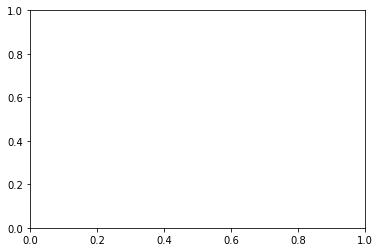

In [28]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
low_importance = []
high_importance = []
threshold = 0.075
for i,v in enumerate(importance):
	if abs(v) > threshold:
		high_importance.append(features_list[i])
	else:
		low_importance.append(features_list[i])
	print('Feature: ', features_list[i],'Score: ', (i,v))

print("----------------------------------------------------------------")
print("List of high importance features: ", high_importance)
print("List of low importance features: ", low_importance)
# plot feature importance
y_pos = range(len(features_list))
plt.bar(y_pos, importance)
plt.xticks(y_pos, features_list, rotation=45)
pyplot.savefig('Coeff_first_iteration.png')
pyplot.show()

# SHAP (Logistic Regression)

In [ ]:
import time
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=features_list_for_regression)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('MDI_importances_initial.png')

# 02_Improved Model

In [41]:
X = df[features_list]

In [42]:
# drop irrelevant columns
# update feature list
to_remove = ['links_count(problem)', 'inquery_intensity(Problem)', 'language_confidence(Problem)', 'bulleted_list_count(Problem)', 'Coleman(Problem)', 'Gunning(Problem)', 'words_per_sentence_no_stop_words(Problem)'] # 'verbs_count', 'stop_words_count', 'words_count']
to_remove.extend(lst_low_variance)

for tr in to_remove:
    if tr in X:
        X.drop([tr], axis=1, inplace=True)
        provided_features.remove(tr)

In [43]:
#Split into two sets of training and testing data

# Select features for model initialization
X_numpy = X.to_numpy()

X_train_res, X_test, y_train_res, y_test = train_test_split(X_numpy, y, test_size=0.2, random_state=42, shuffle=True)

# Oversampling the data
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

#print(X_train_res.shape)
#print(y_train_res.value_counts())

LinearSVC(random_state=123)


Liblinear failed to converge, increase the number of iterations.


SVC - rbf
Recall: 0.583
Accuracy: 0.714
Precision: 0.553
F1 Score: 0.554


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


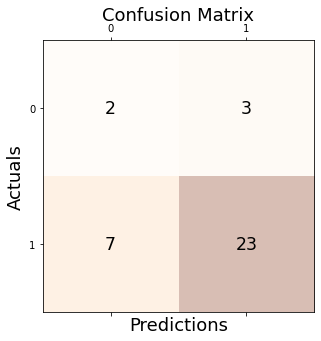

LinearSVC
Recall: 0.683
Accuracy: 0.600
Precision: 0.590
F1 Score: 0.536


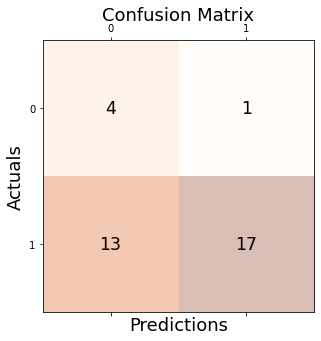

RandomForestClassifier
Recall: 0.583
Accuracy: 0.857
Precision: 0.689
F1 Score: 0.603


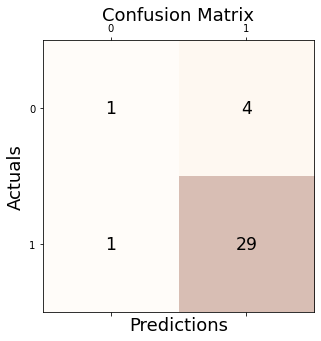

SGDClassifier
Recall: 0.550
Accuracy: 0.800
Precision: 0.560
F1 Score: 0.554


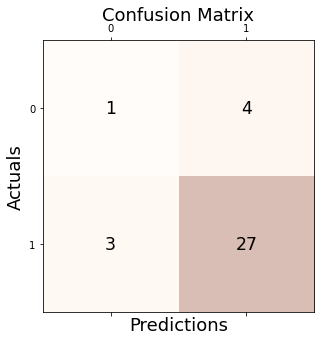

LogisticRegression
Recall: 0.633
Accuracy: 0.800
Precision: 0.615
F1 Score: 0.622


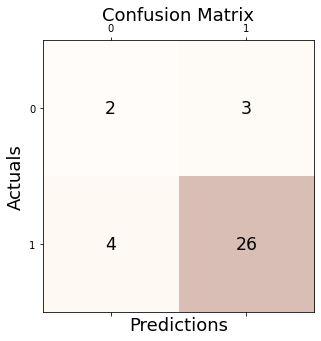

KNN
Recall: 0.583
Accuracy: 0.714
Precision: 0.553
F1 Score: 0.554


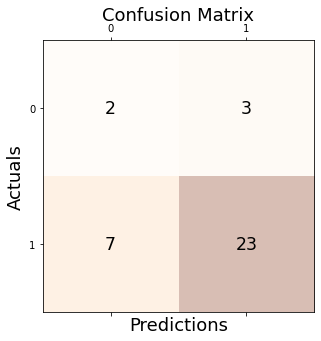

In [44]:
# train classifier

classifier = ['SVC - rbf', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'LogisticRegression', 'KNN']
predictions = []
#SVC
################################################################################
clf = SVC(kernel='rbf')
clf.fit(X_train_res, y_train_res)
# predict
y_pred_svc = clf.predict(X_test)
predictions.append(y_pred_svc)

svc = SVC()

#LinearSVC
################################################################################
lsvc = LinearSVC(verbose=0, random_state=123)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

lsvc.fit(X_train_res, y_train_res)
score = lsvc.score(X_train_res, y_train_res)
#print(" LinearSVC Score: ", score)
y_pred_linearsvc = lsvc.predict(X_test)
predictions.append(y_pred_linearsvc)

# RandomForestRegressor
################################################################################

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=110, bootstrap=True)
forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_test)
predictions.append(y_pred)

# SGDClassifier
################################################################################

clf = linear_model.SGDClassifier()
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
predictions.append(y_pred)

# Logistic Regression
################################################################################

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
predictions.append(y_pred)

# KNN
#################################################################################
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_res, y_train_res)
y_pred_neigh = neigh.predict(X_test)
predictions.append(y_pred_neigh)
#rforest = RandomForestClassifier(random_state=123)
#dtree = DecisionTreeClassifier()

for i, clf in enumerate(classifier):
    print(clf)
    print('Recall: %.3f' % recall_score(y_test, predictions[i], average='macro'))
    print('Accuracy: %.3f' % accuracy_score(y_test, predictions[i]))
    print('Precision: %.3f' % precision_score(y_test, predictions[i], average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, predictions[i], average='macro'))

    # Calculate the confusion matrix
    #
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions[i])
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

#03_Hyperparameter Tuning